В этой тетрадке рассказываем, как работать с классом `Table` из модуля `table.py` для определения цветов на шаблоне.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../table/")
from table import Table

**Во-первых,** надо сформировать/загрузить данные о размере (в мм!) всего шаблона (`template`, с рамкой), внутренней рамки (`roi`) и тестовой полоски (`strip`). Также следует указать коэффициент для перехода от мм к пикселям (для работы с изображениями). 

In [2]:
table_args = {}

In [3]:
table_args['w_template_mm'], table_args['h_template_mm'] = 130, 64
table_args['w_roi_mm'], table_args['h_roi_mm'] = 125, 60
table_args['w_strip_mm'], table_args['h_strip_mm'] = 116, 7
table_args['scale'] = 5

**Во-вторых,** необходимо указать словарь с координаты цветных ячеек (в мм, в **системе координат внутренней рамки**) и поля для расположения полоски (в ней же).

In [4]:
coords_roi_mm = {}
coords_roi_mm['strip'] = ((0, 0), (130, 15))
coords_roi_mm['LEU_1'] = ((55.0, 15.9), (59.8, 19.0))
coords_roi_mm['LEU_2'] = ((55.0, 20.8), (59.8, 23.9))
coords_roi_mm['LEU_3'] = ((55.0, 25.7), (59.8, 28.8))
coords_roi_mm['LEU_4'] = ((55.0, 30.6), (59.8, 33.7))
coords_roi_mm['LEU_5'] = ((55.0, 35.5), (59.8, 38.6))
coords_roi_mm['NIT_1'] = ((61.7, 15.9), (66.6, 19.0))
coords_roi_mm['NIT_2'] = ((61.7, 20.8), (66.6, 23.9))
coords_roi_mm['NIT_3'] = ((61.7, 25.7), (66.6, 28.8))
coords_roi_mm['URO_1'] = ((68.5, 15.9), (73.4, 19))
coords_roi_mm['URO_2'] = ((68.5, 20.8), (73.4, 23.9))
coords_roi_mm['URO_3'] = ((68.5, 25.7), (73.4, 28.8))
coords_roi_mm['URO_4'] = ((68.5, 30.6), (73.4, 33.7))
coords_roi_mm['URO_5'] = ((68.5, 35.5), (73.4, 38.6))
coords_roi_mm['PRO_1'] = ((75.1, 15.9), (80.0, 19))
coords_roi_mm['PRO_2'] = ((75.1, 20.8), (80.0, 23.9))
coords_roi_mm['PRO_3'] = ((75.1, 25.7), (80.0, 28.8))
coords_roi_mm['PRO_4'] = ((75.1, 30.6), (80.0, 33.7))
coords_roi_mm['PRO_5'] = ((75.1, 35.5), (80.0, 38.6))
coords_roi_mm['PRO_6'] = ((75.1, 40.4), (80.0, 43.5))
coords_roi_mm['PH_1'] = ((81.8, 15.9), (86.7, 19))
coords_roi_mm['PH_2'] = ((81.8, 20.8), (86.7, 23.9))
coords_roi_mm['PH_3'] = ((81.8, 25.7), (86.7, 28.8))
coords_roi_mm['PH_4'] = ((81.8, 30.6), (86.7, 33.7))
coords_roi_mm['PH_5'] = ((81.8, 35.5), (86.7, 38.6))
coords_roi_mm['PH_6'] = ((81.8, 40.4), (86.7, 43.5))
coords_roi_mm['PH_7'] = ((81.8, 45.3), (86.7, 48.4))
coords_roi_mm['BLO_1'] = ((88.5, 15.9), (93.5, 19))
coords_roi_mm['BLO_2'] = ((88.5, 20.8), (93.5, 23.9))
coords_roi_mm['BLO_3'] = ((88.5, 25.7), (93.5, 28.8))
coords_roi_mm['BLO_4'] = ((88.5, 30.6), (93.5, 33.7))
coords_roi_mm['BLO_5'] = ((88.5, 35.5), (93.5, 38.6))
coords_roi_mm['BLO_6'] = ((88.5, 40.4), (93.5, 43.5))
coords_roi_mm['BLO_7'] = ((88.5, 45.3), (93.5, 48.4))
coords_roi_mm['SG_1'] = ((95.2, 15.9), (100, 19))
coords_roi_mm['SG_2'] = ((95.2, 20.8), (100, 23.9))
coords_roi_mm['SG_3'] = ((95.2, 25.7), (100, 28.8))
coords_roi_mm['SG_4'] = ((95.2, 30.6), (100, 33.7))
coords_roi_mm['SG_5'] = ((95.2, 35.5), (100, 38.6))
coords_roi_mm['SG_6'] = ((95.2, 40.4), (100, 43.5))
coords_roi_mm['SG_7'] = ((95.2, 45.3), (100, 48.4))
coords_roi_mm['KET_1'] = ((102.0, 15.9), (106.9, 19.0))
coords_roi_mm['KET_2'] = ((102.0, 20.8), (106.9, 23.9))
coords_roi_mm['KET_3'] = ((102.0, 25.7), (106.9, 28.8))
coords_roi_mm['KET_4'] = ((102.0, 30.6), (106.9, 33.7))
coords_roi_mm['KET_5'] = ((102.0, 35.5), (106.9, 38.6))
coords_roi_mm['KET_6'] = ((102.0, 40.4), (106.9, 43.5))
coords_roi_mm['BIL_1'] = ((108.7, 15.9), (113.6, 19.0))
coords_roi_mm['BIL_2'] = ((108.7, 20.8), (113.6, 23.9))
coords_roi_mm['BIL_3'] = ((108.7, 25.7), (113.6, 28.8))
coords_roi_mm['BIL_4'] = ((108.7, 30.6), (113.6, 33.7))
coords_roi_mm['GLU_1'] = ((115.5, 15.9), (120.2, 19.0))
coords_roi_mm['GLU_2'] = ((115.5, 20.8), (120.2, 23.9))
coords_roi_mm['GLU_3'] = ((115.5, 25.7), (120.2, 28.8))
coords_roi_mm['GLU_4'] = ((115.5, 30.6), (120.2, 33.7))
coords_roi_mm['GLU_5'] = ((115.5, 35.5), (120.2, 38.6))
coords_roi_mm['GLU_6'] = ((115.5, 40.4), (120.2, 43.5))

In [5]:
table_args['coords_roi_mm'] = coords_roi_mm

**В-третьих,** необходимо передать словарь с координатами ячеек на полоске (в мм, в **системе координат полоски**):

In [6]:
coords_strip_mm = {}
coords_strip_mm['LEU'] = ((48.8, 1.1), (53.3, 5.6))
coords_strip_mm['NIT'] = ((55.5, 1.1), (60.0, 5.6))
coords_strip_mm['URO'] = ((62.2, 1.1), (66.7, 5.6))
coords_strip_mm['PRO'] = ((68.9, 1.1), (73.4, 5.6))
coords_strip_mm['PH'] = ((75.6, 1.1), (80.1, 5.6))
coords_strip_mm['BLO'] = ((82.3, 1.1), (86.8, 5.6))
coords_strip_mm['SG'] = ((89.0, 1.1), (93.5, 5.6))
coords_strip_mm['KET'] = ((95.7, 1.1), (100.2, 5.6))
coords_strip_mm['BIL'] = ((102.4, 1.1), (106.9, 5.6))
coords_strip_mm['GLU'] = ((109.1, 1.1), (113.6, 5.6))

In [7]:
table_args['coords_strip_mm'] = coords_strip_mm

Теперь можно создавать экземпляр нашего класса для работы с изобрежениями шаблонов заданной геометрии:

In [8]:
table = Table(**table_args)

Для демонстрации использования класса загрузим тестовое изображение:

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 4

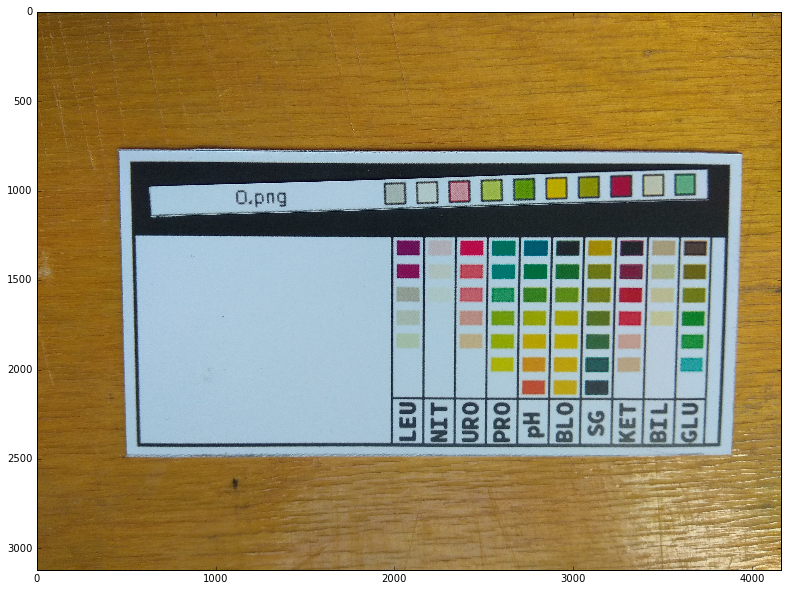

In [10]:
test_image = cv2.cvtColor(cv2.imread("../../images/stripe experiments/tests/IMG_20170909_124700.jpg"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(test_image)
plt.show()

Сымитируем работу метода `fit`, вызывая по отдельности вспомогательные методы.

Определение всего шаблона:

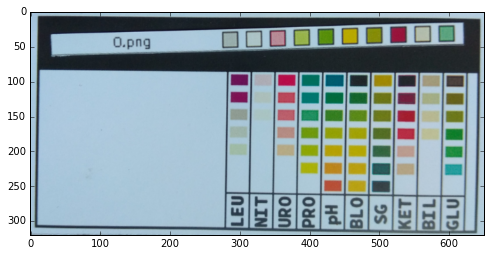

In [11]:
template = table._detect_template_(table._downsample_(test_image))
plt.imshow(template)

Определение прямоугольника внутри шаблона:

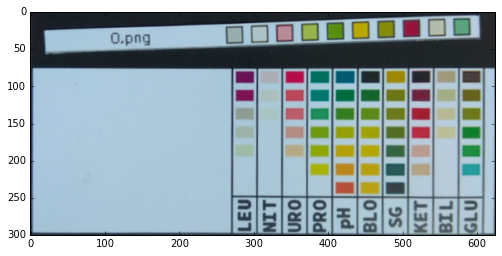

In [12]:
roi = table._detect_roi_(template)
plt.imshow(roi)

Определение полоски в черном поле:

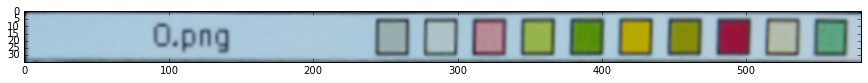

In [13]:
strip = table._detect_strip_(roi)
plt.imshow(strip)

Считывание цветов с шаблона:

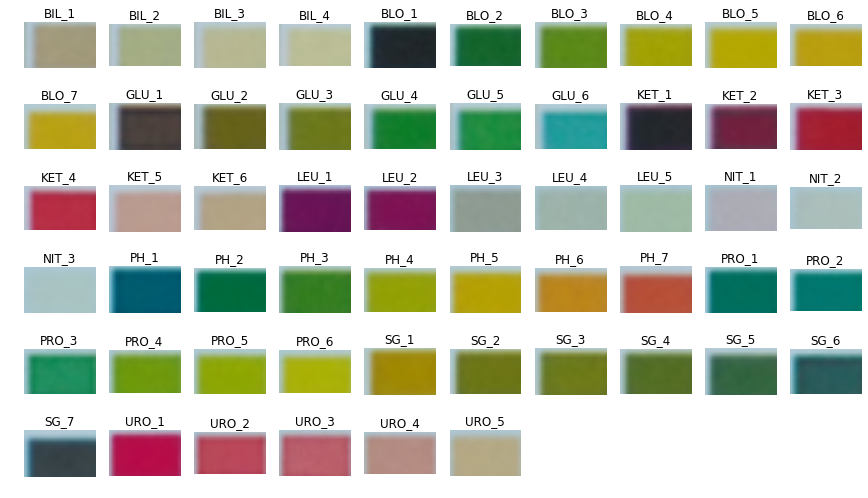

In [14]:
palette = table._read_palette_(roi)

plt.figure(figsize=(15, 10))
for j, name in enumerate(sorted(palette.keys()), 1):
    if name == 'strip':
        continue
    plt.subplot(7, 10, j)
    plt.axis('off')
    plt.title(name)
    plt.imshow(palette[name])
plt.show()

Считывание цветов с полоски:

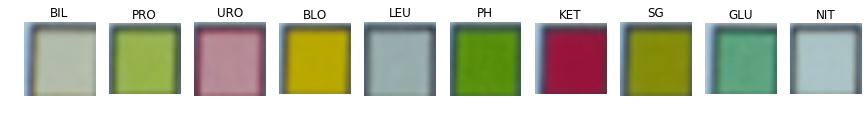

In [15]:
colorbar = table._read_colorbar_(strip)

plt.figure(figsize=(15, 10))
for j, (name, image) in enumerate(colorbar.iteritems(), 1):
    if name == 'strip':
        continue
    plt.subplot(1, 10, j)
    plt.axis('off')
    plt.title(name)
    plt.imshow(image)
plt.show()

Как видно, совмещение ожидаемых и реальных расположений ячеек неидеально, но кажется вполне достаточным для проведение цветового анализа.

Все эти операции можно проделать, вызвав метод `fit` для полного цикла обработки одного снимка и два атрибута `palette` и `colorbar` для получения словарей с изображениями тестовых цветов и цветов с полоски соответственно.

In [19]:
table.fit(test_image)
palette = table.palette
colorbar = table.colorbar

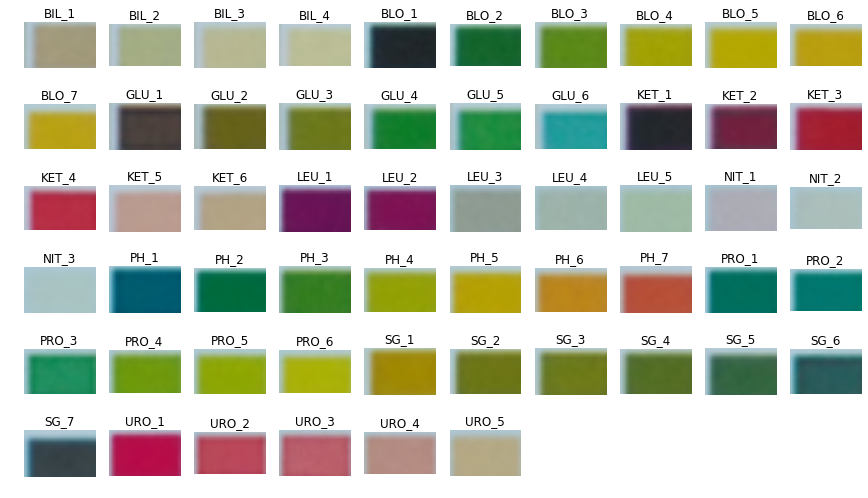

In [20]:
plt.figure(figsize=(15, 10))
for j, name in enumerate(sorted(palette.keys()), 1):
    if name == 'strip':
        continue
    plt.subplot(7, 10, j)
    plt.axis('off')
    plt.title(name)
    plt.imshow(palette[name])
plt.show()

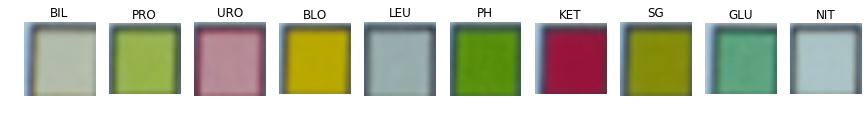

In [21]:
plt.figure(figsize=(15, 10))
for j, (name, image) in enumerate(colorbar.iteritems(), 1):
    if name == 'strip':
        continue
    plt.subplot(1, 10, j)
    plt.axis('off')
    plt.title(name)
    plt.imshow(image)
plt.show()